In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt


In [28]:
# Load your uploaded file directly (since you see spam.csv in Colab root)
df = pd.read_csv("spam.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (5572, 2)


,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [29]:
from sklearn.preprocessing import LabelEncoder

# if your df["target"] column contains "ham"/"spam", convert to 0/1
le = LabelEncoder()
labels_num = le.fit_transform(df["target"])
# now labels_num is an array of 0s and 1s
# le.classes_ will show ['ham', 'spam']
print("Classes:", le.classes_)


Classes: ['ham' 'spam']


In [30]:
texts = df["text"].astype(str).tolist()    # email bodies
labels = df["target"].tolist()             # 0=ham, 1=spam


In [31]:
vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(texts)
print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (5572, 8404)


In [32]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())
print("PCA output shape:", X_pca.shape)


PCA output shape: (5572, 2)


In [33]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)


In [34]:
hier = AgglomerativeClustering(n_clusters=2)
hier_labels = hier.fit_predict(X_pca)


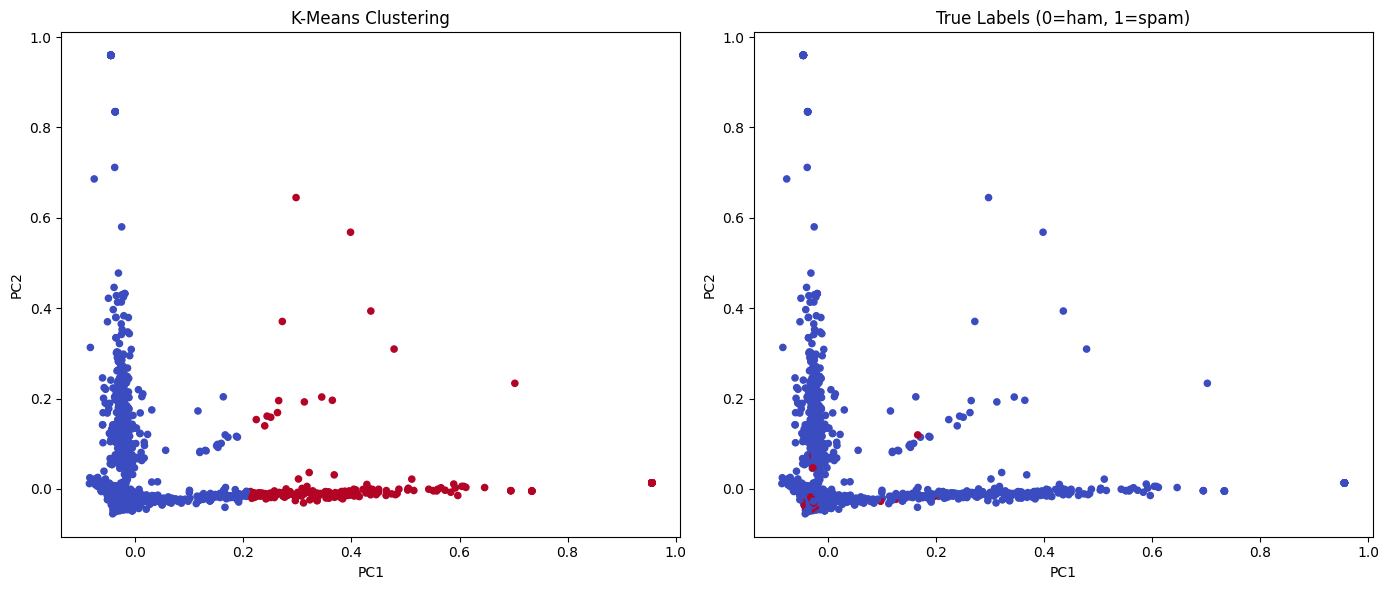

In [36]:
plt.figure(figsize=(14,6))

# Left: K-Means clusters (numeric already)
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="coolwarm", s=20)
plt.title("K-Means Clustering")
plt.xlabel("PC1"); plt.ylabel("PC2")

# Right: True labels (now numeric)
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_num, cmap="coolwarm", s=20)
plt.title("True Labels (0=ham, 1=spam)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()

